In [96]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [97]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# Read data
train = train_raw = pd.read_csv('data/train.csv')

In [100]:
# train = train_raw[train_raw['label'] != 9]
# train = train[train['label'] != 8]
# train = train[train['label'] != 7]
# train = train[train['label'] != 6]

# train.describe()

In [101]:
labels = train.iloc[:,0].values.astype('int32')
x_train = (train.iloc[:,1:].values).astype('float32')
x_test = (pd.read_csv('data/test.csv').values).astype('float32')

In [102]:
# one hot encoding
y_train = np_utils.to_categorical(labels)

In [104]:
scale = np.max(x_train)
x_train /= scale
x_test /= scale

# mean = np.std(x_train)
# x_train -= mean
# x_test -= mean

In [105]:
input_dim = x_train.shape[1]
nb_classes = y_train.shape[1]

In [106]:
model = Sequential()
model.add(Dense(128, input_dim=input_dim))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.15))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

In [107]:
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [108]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.1, verbose=2)

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
 - 20s - loss: 0.3152 - acc: 0.9031 - val_loss: 0.1470 - val_acc: 0.9540
Epoch 2/10
 - 17s - loss: 0.1495 - acc: 0.9538 - val_loss: 0.1147 - val_acc: 0.9645
Epoch 3/10
 - 17s - loss: 0.1146 - acc: 0.9637 - val_loss: 0.1105 - val_acc: 0.9648
Epoch 4/10
 - 18s - loss: 0.0962 - acc: 0.9692 - val_loss: 0.0996 - val_acc: 0.9702
Epoch 5/10
 - 17s - loss: 0.0809 - acc: 0.9736 - val_loss: 0.1088 - val_acc: 0.9686
Epoch 6/10
 - 21s - loss: 0.0720 - acc: 0.9770 - val_loss: 0.1090 - val_acc: 0.9717
Epoch 7/10
 - 19s - loss: 0.0643 - acc: 0.9794 - val_loss: 0.0951 - val_acc: 0.9743
Epoch 8/10
 - 22s - loss: 0.0590 - acc: 0.9812 - val_loss: 0.0968 - val_acc: 0.9748
Epoch 9/10
 - 19s - loss: 0.0539 - acc: 0.9825 - val_loss: 0.0960 - val_acc: 0.9738
Epoch 10/10
 - 19s - loss: 0.0510 - acc: 0.9831 - val_loss: 0.1001 - val_acc: 0.9736


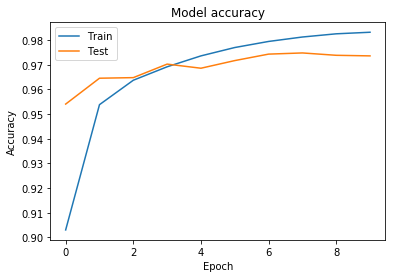

In [110]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

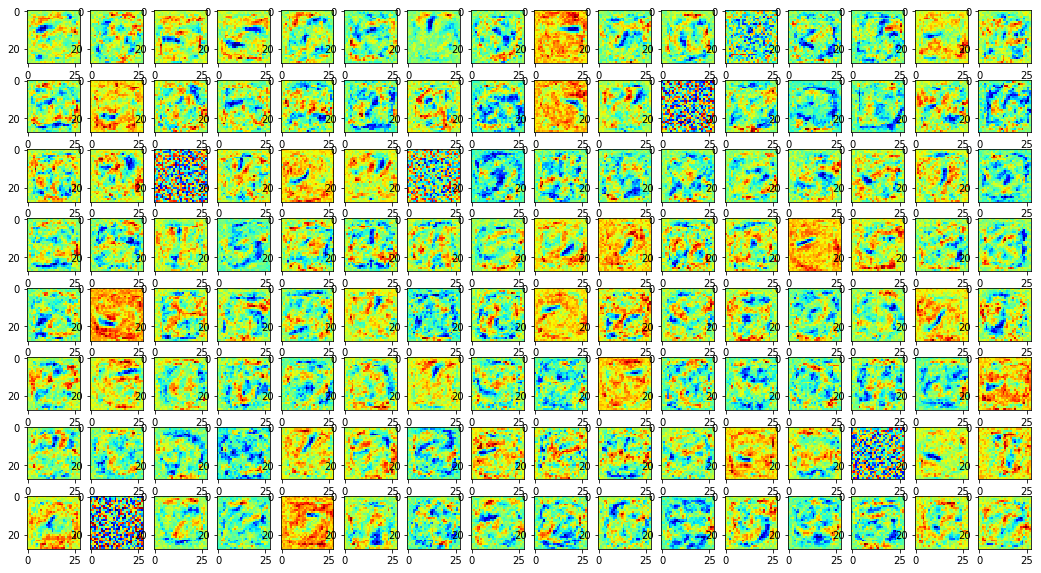

In [111]:
layer_0_weights_and_biases = model.layers[0].get_weights()
layer_0_weights = layer_0_weights_and_biases[0]
layer_0_weights /= np.max(layer_0_weights)
fig = plt.figure(figsize=(18, 10))
for i in range(128):
    weights_pic = layer_0_weights[:,i].reshape(28, 28)
    fig.add_subplot(8, 16, i + 1)
    plt.imshow(weights_pic, cmap='jet')

In [48]:
first_hidden_layer = model.layers[0]
second_hidden_layer = model.layers[3]
output_layer = model.layers[6]

In [56]:
first_hidden_layer.trainable = False
second_hidden_layer.trainable = False
output_layer.trainable = False

In [73]:
dream_model = Sequential()
dream_model.add(Dense(784, input_dim=6, kernel_initializer=keras.initializers.Constant(value=-1)))
dream_model.add(first_hidden_layer)
dream_model.add(Activation('relu'))
dream_model.add(second_hidden_layer)
dream_model.add(Activation('relu'))
dream_model.add(output_layer)
dream_model.add(Activation('softmax'))

In [74]:
dream_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [75]:
training_data = []
for i in range(6):
    data_point = np.zeros(6)
    data_point[i] = 1
    training_data.append(data_point)
dream_train = np.array(training_data)

In [76]:
dream_model.fit(dream_train, dream_train, epochs=10000, validation_split=0, verbose=0)

In [77]:
dream_layer_weights = dream_model.layers[0].get_weights()[0]
dream_layer_weights_pos = dream_layer_weights - np.min(dream_layer_weights)
dream_values = 255 * dream_layer_weights_pos / np.max(dream_layer_weights_pos)

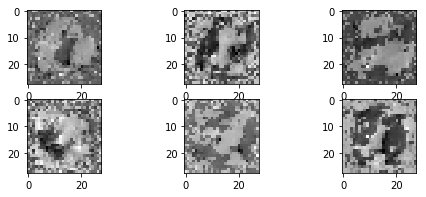

In [78]:
# plt.imshow(dream_values[3].reshape(28,28), cmap=plt.get_cmap('gray'))
fig = plt.figure(figsize=(8, 3))
for i in range(6):
    fig.add_subplot(2, 3, i + 1)
    plt.imshow(dream_values[i].reshape(28,28), cmap='gray')

In [79]:
pd.DataFrame(model.predict_classes(dream_layer_weights))

,0
0,0
1,5
2,5
3,5
4,4
5,5
